In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.utils import resample
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
import pickle
import joblib
from prophet import Prophet

In [2]:
data = pd.read_csv("Chicago_Crimes_2012_to_2017.csv", on_bad_lines='skip')

In [3]:
data.head()

,Unnamed: 0,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,3,10508693,HZ250496,05/03/2016 11:40:00 PM,013XX S SAWYER AVE,0486,BATTERY,DOMESTIC BATTERY SIMPLE,APARTMENT,True,...,24.0,29.0,08B,1154907.0,1893681.0,2016,05/10/2016 03:56:50 PM,41.864073,-87.706819,"(41.864073157, -87.706818608)"
1,89,10508695,HZ250409,05/03/2016 09:40:00 PM,061XX S DREXEL AVE,0486,BATTERY,DOMESTIC BATTERY SIMPLE,RESIDENCE,False,...,20.0,42.0,08B,1183066.0,1864330.0,2016,05/10/2016 03:56:50 PM,41.782922,-87.604363,"(41.782921527, -87.60436317)"
2,197,10508697,HZ250503,05/03/2016 11:31:00 PM,053XX W CHICAGO AVE,0470,PUBLIC PEACE VIOLATION,RECKLESS CONDUCT,STREET,False,...,37.0,25.0,24,1140789.0,1904819.0,2016,05/10/2016 03:56:50 PM,41.894908,-87.758372,"(41.894908283, -87.758371958)"
3,673,10508698,HZ250424,05/03/2016 10:10:00 PM,049XX W FULTON ST,0460,BATTERY,SIMPLE,SIDEWALK,False,...,28.0,25.0,08B,1143223.0,1901475.0,2016,05/10/2016 03:56:50 PM,41.885687,-87.749516,"(41.885686845, -87.749515983)"
4,911,10508699,HZ250455,05/03/2016 10:00:00 PM,003XX N LOTUS AVE,0820,THEFT,$500 AND UNDER,RESIDENCE,False,...,28.0,25.0,06,1139890.0,1901675.0,2016,05/10/2016 03:56:50 PM,41.886297,-87.761751,"(41.886297242, -87.761750709)"


In [4]:
data.tail()

,Unnamed: 0,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
1456709,6250330,10508679,HZ250507,05/03/2016 11:33:00 PM,026XX W 23RD PL,0486,BATTERY,DOMESTIC BATTERY SIMPLE,APARTMENT,True,...,28.0,30.0,08B,1159105.0,1888300.0,2016,05/10/2016 03:56:50 PM,41.849222,-87.691556,"(41.849222028, -87.69155551)"
1456710,6251089,10508680,HZ250491,05/03/2016 11:30:00 PM,073XX S HARVARD AVE,1310,CRIMINAL DAMAGE,TO PROPERTY,APARTMENT,True,...,17.0,69.0,14,1175230.0,1856183.0,2016,05/10/2016 03:56:50 PM,41.760744,-87.633335,"(41.760743949, -87.63333531)"
1456711,6251349,10508681,HZ250479,05/03/2016 12:15:00 AM,024XX W 63RD ST,041A,BATTERY,AGGRAVATED: HANDGUN,SIDEWALK,False,...,15.0,66.0,04B,1161027.0,1862810.0,2016,05/10/2016 03:56:50 PM,41.779235,-87.685207,"(41.779234743, -87.685207125)"
1456712,6253257,10508690,HZ250370,05/03/2016 09:07:00 PM,082XX S EXCHANGE AVE,0486,BATTERY,DOMESTIC BATTERY SIMPLE,SIDEWALK,False,...,7.0,46.0,08B,1197261.0,1850727.0,2016,05/10/2016 03:56:50 PM,41.745252,-87.552773,"(41.745251975, -87.552773464)"
1456713,6253474,10508692,HZ250517,05/03/2016 11:38:00 PM,001XX E 75TH ST,5007,OTHER OFFENSE,OTHER WEAPONS VIOLATION,PARKING LOT/GARAGE(NON.RESID.),True,...,6.0,69.0,26,1178696.0,1855324.0,2016,05/10/2016 03:56:50 PM,41.758309,-87.620658,"(41.75830866, -87.620658418)"


In [5]:
data.shape

(1456714, 23)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1456714 entries, 0 to 1456713
Data columns (total 23 columns):
 #   Column                Non-Null Count    Dtype  
---  ------                --------------    -----  
 0   Unnamed: 0            1456714 non-null  int64  
 1   ID                    1456714 non-null  int64  
 2   Case Number           1456713 non-null  object 
 3   Date                  1456714 non-null  object 
 4   Block                 1456714 non-null  object 
 5   IUCR                  1456714 non-null  object 
 6   Primary Type          1456714 non-null  object 
 7   Description           1456714 non-null  object 
 8   Location Description  1455056 non-null  object 
 9   Arrest                1456714 non-null  bool   
 10  Domestic              1456714 non-null  bool   
 11  Beat                  1456714 non-null  int64  
 12  District              1456713 non-null  float64
 13  Ward                  1456700 non-null  float64
 14  Community Area        1456674 non-

In [7]:
df = data[['ID','Date','Primary Type','Location Description','Arrest','Domestic']]

In [8]:
df.head()

,ID,Date,Primary Type,Location Description,Arrest,Domestic
0,10508693,05/03/2016 11:40:00 PM,BATTERY,APARTMENT,True,True
1,10508695,05/03/2016 09:40:00 PM,BATTERY,RESIDENCE,False,True
2,10508697,05/03/2016 11:31:00 PM,PUBLIC PEACE VIOLATION,STREET,False,False
3,10508698,05/03/2016 10:10:00 PM,BATTERY,SIDEWALK,False,False
4,10508699,05/03/2016 10:00:00 PM,THEFT,RESIDENCE,False,True


In [9]:
df.isnull().sum()

ID                         0
Date                       0
Primary Type               0
Location Description    1658
Arrest                     0
Domestic                   0
dtype: int64

In [10]:
df=df.dropna()

In [11]:
df.duplicated()

0          False
1          False
2          False
3          False
4          False
           ...  
1456709    False
1456710    False
1456711    False
1456712    False
1456713    False
Length: 1455056, dtype: bool

In [12]:
df.Date = pd.to_datetime(df.Date,format = '%m/%d/%Y %I:%M:%S %p')

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1455056 entries, 0 to 1456713
Data columns (total 6 columns):
 #   Column                Non-Null Count    Dtype         
---  ------                --------------    -----         
 0   ID                    1455056 non-null  int64         
 1   Date                  1455056 non-null  datetime64[ns]
 2   Primary Type          1455056 non-null  object        
 3   Location Description  1455056 non-null  object        
 4   Arrest                1455056 non-null  bool          
 5   Domestic              1455056 non-null  bool          
dtypes: bool(2), datetime64[ns](1), int64(1), object(2)
memory usage: 58.3+ MB


In [14]:
df.columns

Index(['ID', 'Date', 'Primary Type', 'Location Description', 'Arrest',
       'Domestic'],
      dtype='object')

In [15]:
df['Primary Type'].value_counts().head(10)

Primary Type
THEFT                  328987
BATTERY                263699
CRIMINAL DAMAGE        155454
NARCOTICS              135240
ASSAULT                 91289
OTHER OFFENSE           87873
BURGLARY                83395
DECEPTIVE PRACTICE      74318
MOTOR VEHICLE THEFT     61138
ROBBERY                 57310
Name: count, dtype: int64

In [16]:
df[df['Primary Type']=="THEFT"]['Arrest'].value_counts()

Arrest
False    292315
True      36672
Name: count, dtype: int64

In [17]:
df.columns

Index(['ID', 'Date', 'Primary Type', 'Location Description', 'Arrest',
       'Domestic'],
      dtype='object')

In [18]:
df['Location Description'].value_counts().head(10)

Location Description
STREET                            330471
RESIDENCE                         233530
APARTMENT                         185023
SIDEWALK                          160891
OTHER                              55774
PARKING LOT/GARAGE(NON.RESID.)     41768
ALLEY                              31771
RESIDENTIAL YARD (FRONT/BACK)      30645
SMALL RETAIL STORE                 28803
SCHOOL, PUBLIC, BUILDING           25959
Name: count, dtype: int64

In [19]:
df[df['Location Description']=="STREET"]['Arrest'].value_counts()

Arrest
False    246825
True      83646
Name: count, dtype: int64

In [20]:
df.index = pd.DatetimeIndex(df.Date)

C:\Users\Lenovo'\AppData\Local\Temp\ipykernel_28316\1213021823.py:1: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  plt.plot(df.resample('Y').size())


Text(0, 0.5, 'Number of Crimes')

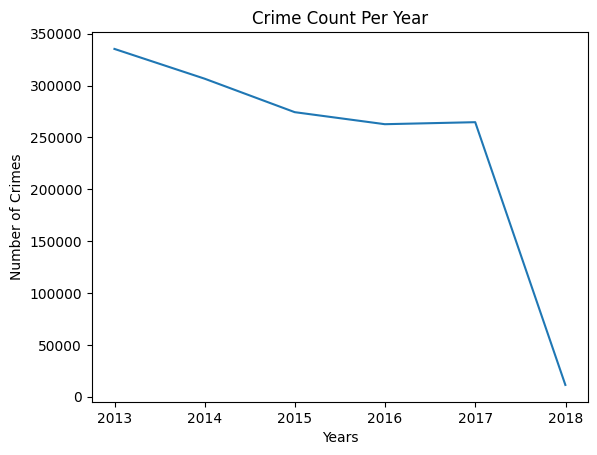

In [21]:
plt.plot(df.resample('Y').size())
plt.title("Crime Count Per Year")
plt.xlabel("Years")
plt.ylabel("Number of Crimes")

C:\Users\Lenovo'\AppData\Local\Temp\ipykernel_28316\2503122010.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  plt.plot(df.resample('M').size())


Text(0, 0.5, 'Number of Crimes')

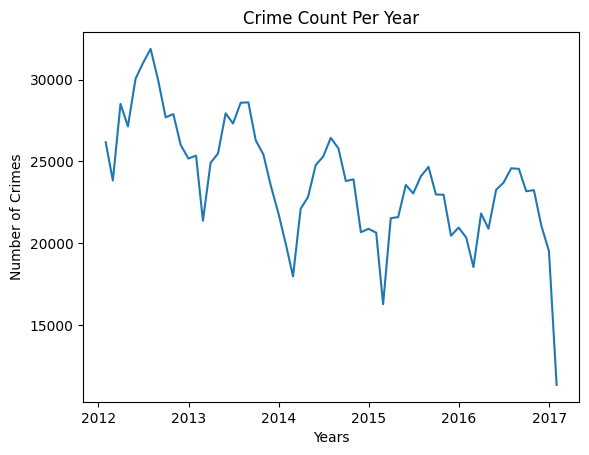

In [22]:
plt.plot(df.resample('M').size())
plt.title("Crime Count Per Year")
plt.xlabel("Years")
plt.ylabel("Number of Crimes")

In [23]:
df_prophet = pd.DataFrame(df.resample('M').size().reset_index())

C:\Users\Lenovo'\AppData\Local\Temp\ipykernel_28316\2509487239.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df_prophet = pd.DataFrame(df.resample('M').size().reset_index())


In [24]:
df_prophet.columns =['Date','Crime Count']

In [25]:
df_prophet

,Date,Crime Count
0,2012-01-31,26172
1,2012-02-29,23832
2,2012-03-31,28520
3,2012-04-30,27144
4,2012-05-31,30055
...,...,...
56,2016-09-30,23176
57,2016-10-31,23243
58,2016-11-30,21077
59,2016-12-31,19517


In [26]:
df_prophet=df_prophet.rename(columns={'Date':'ds','Crime Count':'y'})

In [27]:
df_prophet

,ds,y
0,2012-01-31,26172
1,2012-02-29,23832
2,2012-03-31,28520
3,2012-04-30,27144
4,2012-05-31,30055
...,...,...
56,2016-09-30,23176
57,2016-10-31,23243
58,2016-11-30,21077
59,2016-12-31,19517


In [28]:
m = Prophet()
m.fit(df_prophet)

15:05:25 - cmdstanpy - INFO - Chain [1] start processing
15:05:25 - cmdstanpy - INFO - Chain [1] done processing


In [29]:
pred=m.make_future_dataframe(periods=24,freq='M')
forcast = m.predict(pred)

C:\Users\Lenovo'\AppData\Local\Programs\Python\Python310\lib\site-packages\prophet\forecaster.py:1854: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(


In [30]:
forcast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2012-01-31,29502.486930,25800.639828,28225.436907,29502.486930,29502.486930,-2461.639575,-2461.639575,-2461.639575,-2461.639575,-2461.639575,-2461.639575,0.0,0.0,0.0,27040.847355
1,2012-02-29,29316.241901,23562.965252,25665.288012,29316.241901,29316.241901,-4695.435946,-4695.435946,-4695.435946,-4695.435946,-4695.435946,-4695.435946,0.0,0.0,0.0,24620.805955
2,2012-03-31,29117.152388,27044.553030,29360.933839,29117.152388,29117.152388,-960.315969,-960.315969,-960.315969,-960.315969,-960.315969,-960.315969,0.0,0.0,0.0,28156.836418
3,2012-04-30,28924.485116,26003.359888,28431.075292,28924.485116,28924.485116,-1746.568798,-1746.568798,-1746.568798,-1746.568798,-1746.568798,-1746.568798,0.0,0.0,0.0,27177.916318
4,2012-05-31,28725.395603,28560.255077,30930.959117,28725.395603,28725.395603,932.441757,932.441757,932.441757,932.441757,932.441757,932.441757,0.0,0.0,0.0,29657.837360
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80,2018-09-30,19590.391060,19006.675882,21383.377586,19338.370514,19848.728900,591.229708,591.229708,591.229708,591.229708,591.229708,591.229708,0.0,0.0,0.0,20181.620769
81,2018-10-31,19504.703189,18757.745203,21332.008179,19234.123426,19784.785416,480.396028,480.396028,480.396028,480.396028,480.396028,480.396028,0.0,0.0,0.0,19985.099217
82,2018-11-30,19421.779442,16054.219792,18554.400275,19131.517100,19721.494755,-2067.886150,-2067.886150,-2067.886150,-2067.886150,-2067.886150,-2067.886150,0.0,0.0,0.0,17353.893293
83,2018-12-31,19336.091571,15904.809396,18436.717076,19021.897909,19657.389498,-2179.998167,-2179.998167,-2179.998167,-2179.998167,-2179.998167,-2179.998167,0.0,0.0,0.0,17156.093404


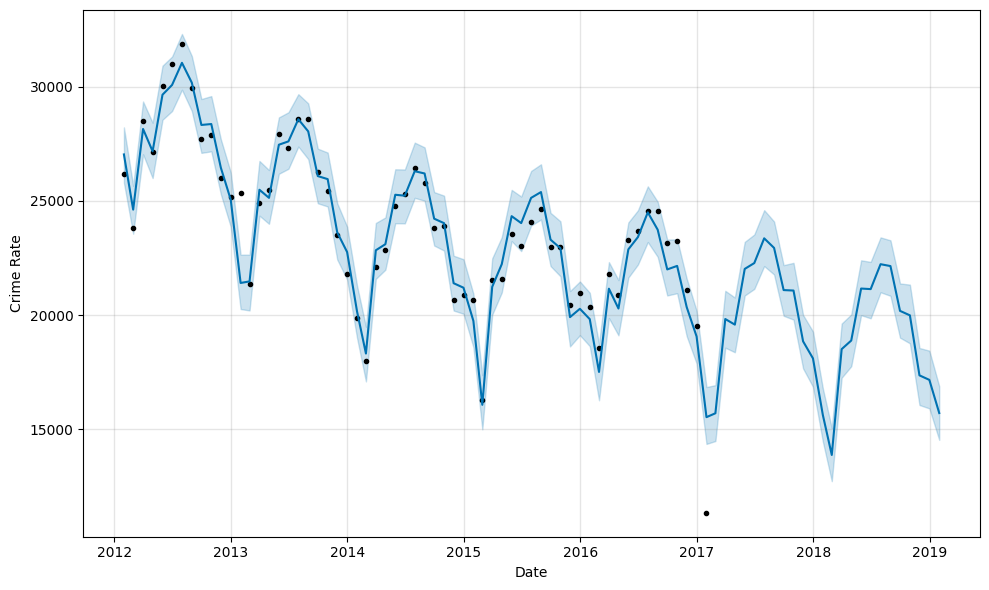

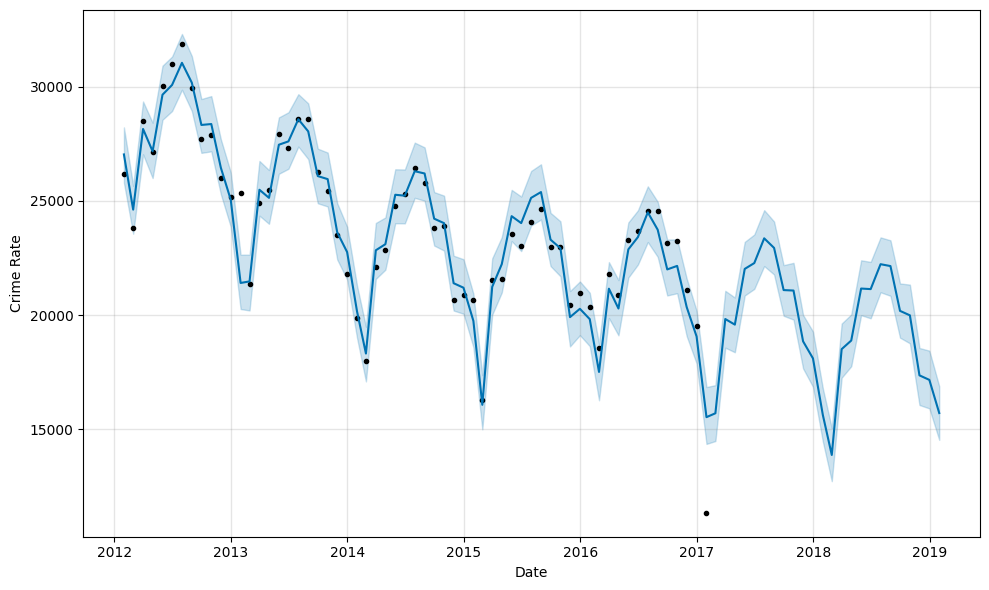

In [31]:
m.plot(forcast,xlabel="Date",ylabel="Crime Rate")

In [32]:
import json
from prophet.serialize import model_to_json, model_from_json

with open('prophet_model.json', 'w') as fout:
    json.dump(model_to_json(m), fout)

In [33]:
with open('prophet_model.json', 'r') as fin:
    m1 = model_from_json(json.load(fin))

In [34]:
x = int(input("Enter Numbers Months to forecast"))

Enter Numbers Months to forecast 36


In [35]:
pred = m1.make_future_dataframe(periods=x ,freq = "M")
forcast = m1.predict(pred)

C:\Users\Lenovo'\AppData\Local\Programs\Python\Python310\lib\site-packages\prophet\forecaster.py:1854: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(


In [36]:
forcast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2012-01-31,29502.486930,25877.197247,28218.454747,29502.486930,29502.486930,-2461.639575,-2461.639575,-2461.639575,-2461.639575,-2461.639575,-2461.639575,0.0,0.0,0.0,27040.847355
1,2012-02-29,29316.241901,23340.921532,25756.228856,29316.241901,29316.241901,-4695.435946,-4695.435946,-4695.435946,-4695.435946,-4695.435946,-4695.435946,0.0,0.0,0.0,24620.805955
2,2012-03-31,29117.152388,26942.551721,29315.803196,29117.152388,29117.152388,-960.315969,-960.315969,-960.315969,-960.315969,-960.315969,-960.315969,0.0,0.0,0.0,28156.836418
3,2012-04-30,28924.485116,25833.831877,28374.206090,28924.485116,28924.485116,-1746.568798,-1746.568798,-1746.568798,-1746.568798,-1746.568798,-1746.568798,0.0,0.0,0.0,27177.916318
4,2012-05-31,28725.395603,28627.508845,30797.057362,28725.395603,28725.395603,932.441757,932.441757,932.441757,932.441757,932.441757,932.441757,0.0,0.0,0.0,29657.837360
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92,2019-09-30,18581.485479,17977.959318,20574.968655,18082.218041,19120.569111,683.622346,683.622346,683.622346,683.622346,683.622346,683.622346,0.0,0.0,0.0,19265.107825
93,2019-10-31,18495.797607,17630.605243,20268.054479,17971.329671,19060.567714,393.742265,393.742265,393.742265,393.742265,393.742265,393.742265,0.0,0.0,0.0,18889.539872
94,2019-11-30,18412.873861,14501.320362,17183.674485,17859.361509,19010.676301,-2544.553938,-2544.553938,-2544.553938,-2544.553938,-2544.553938,-2544.553938,0.0,0.0,0.0,15868.319923
95,2019-12-31,18327.185989,14912.345154,17544.388623,17743.986804,18942.518809,-2093.775028,-2093.775028,-2093.775028,-2093.775028,-2093.775028,-2093.775028,0.0,0.0,0.0,16233.410962


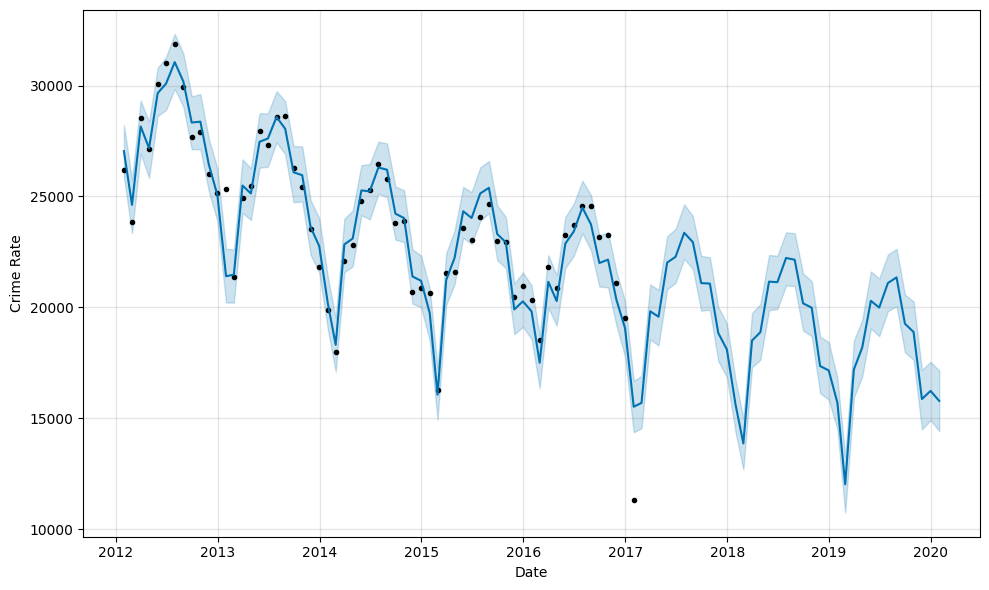

In [37]:
figure = m1.plot(forcast, xlabel='Date', ylabel='Crime Rate')

In [38]:
with open('forecast_model.pkl', 'wb') as file:
    pickle.dump(m, file)